**The accompanying dataset has data about leads generated by a Travel Aggregator in the last six months along with information about them and whether they ended up converting (ie – booking a trip). You need to use this dataset to build a propensity model that the sales team can use to target new leads.**

**Data Description :**

**RowNumber** – row identifier

**LeadId** – id for the lead

**Surname** – prospect surname

**months_since_lead_gen** – number of months since lead was generated

**lead_gen_channel** – channel through which lead was generated 

**Gender** – gender of customer 

**Age** - age of customer

**City** – city of customer

**airline_loyalty_tier** – whether customer belongs to any airline loyalty program and if so which tier 

**no_of_family_members** – number of family members of the customer

**is_6M_enquiry** – whether customer has made a holiday enquiry in the last six months

**is_3M_active** – whether customer has been active on the website / app in the last six months

**Converted_y_N** – whether booked or not


## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Data.csv")

In [3]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0


In [4]:
df.shape

(10000, 13)

In [5]:
df.dtypes

RowNumber                 int64
LeadId                    int64
Surname                  object
months_since_lead_gen     int64
lead_gen_channel         object
Gender                   object
Age                       int64
City                     object
airline_loyalty_tier     object
no_of_family_members      int64
is_6M_enquiry             int64
is_3M_active              int64
Converted_y_N             int64
dtype: object

In [6]:
df.isnull().sum()

RowNumber                0
LeadId                   0
Surname                  0
months_since_lead_gen    0
lead_gen_channel         0
Gender                   0
Age                      0
City                     0
airline_loyalty_tier     0
no_of_family_members     0
is_6M_enquiry            0
is_3M_active             0
Converted_y_N            0
dtype: int64

**no null values**

In [7]:
df.describe()

,RowNumber,LeadId,months_since_lead_gen,Age,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N
count,10000.00000,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,1.569094e+07,4.00330,38.921800,1.530200,0.515100,0.70550,0.203700
std,2886.89568,7.193619e+04,1.00707,10.487806,0.581654,0.499797,0.45584,0.402769
min,1.00000,1.556570e+07,1.00000,18.000000,1.000000,0.000000,0.00000,0.000000
25%,2500.75000,1.562853e+07,3.00000,32.000000,1.000000,0.000000,0.00000,0.000000
50%,5000.50000,1.569074e+07,4.00000,37.000000,1.000000,1.000000,1.00000,0.000000
75%,7500.25000,1.575323e+07,5.00000,44.000000,2.000000,1.000000,1.00000,0.000000
max,10000.00000,1.581569e+07,6.00000,92.000000,4.000000,1.000000,1.00000,1.000000


**DATA ANALYSIS**

INTIAL ANALYSIS

- From the initial observations We can infer that the 'RowNumber' column is basically a row identifier and does not play any significant role in the analysis
- LeadId is also another identification column used for identifying the customers uniquely. We cannot use it for Modelling purpose.
- Surname is also another identification column used for identifying the customers uniquely. We cannot use it for Modelling purpose.

- The categorical Independent variables are :
    - months_since_lead_gen
    - lead_gen_channel
    - Gender
    - City
    - airline_loyalty_tier
    - no_of_family_members	
    - is_6M_enquiry	
    - is_3M_active
- The continuous Independent variables are :
    - Age
    
- The target variable is 'Converted_y_N'

## analysis of target

In [8]:
df["Converted_y_N"].value_counts()

0    7963
1    2037
Name: Converted_y_N, dtype: int64

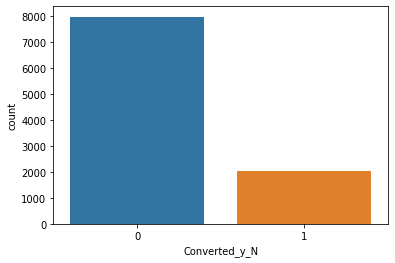

In [9]:
sns.countplot(df["Converted_y_N"])

## here we have imbalance dataset
- 0(non converted)=80%
- 1(converted)  = 20%

## lead gen month analysis

In [10]:
print(df[df.Converted_y_N==1].months_since_lead_gen.value_counts())

4    753
3    513
5    492
2    133
6    127
1     19
Name: months_since_lead_gen, dtype: int64


In [11]:
df[df.Converted_y_N==0].months_since_lead_gen.value_counts()

4    3065
5    1979
3    1910
6     518
2     491
Name: months_since_lead_gen, dtype: int64

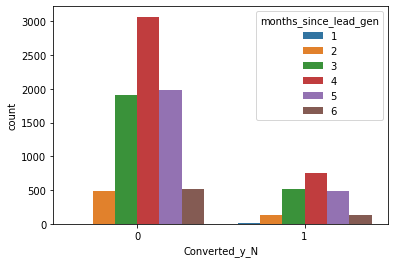

In [12]:
sns.countplot(x=df.Converted_y_N,hue=df.months_since_lead_gen)

- from above plot both maximum number of converted  and not-converted leads  took place in the month of 4
- month wise approach is not good for analysis.
- so, we can get conversion rate of each month to identify the best month of conversion.

In [13]:
print(df[df.months_since_lead_gen==1].Converted_y_N.value_counts(normalize=True))

1    1.0
Name: Converted_y_N, dtype: float64


In [14]:
print(df[df.months_since_lead_gen==2].Converted_y_N.value_counts(normalize=True))

0    0.786859
1    0.213141
Name: Converted_y_N, dtype: float64


In [15]:
print(df[df.months_since_lead_gen==3].Converted_y_N.value_counts(normalize=True))

0    0.788279
1    0.211721
Name: Converted_y_N, dtype: float64


In [16]:
print(df[df.months_since_lead_gen==3].Converted_y_N.value_counts(normalize=True))

0    0.788279
1    0.211721
Name: Converted_y_N, dtype: float64


In [17]:
print(df[df.months_since_lead_gen==4].Converted_y_N.value_counts(normalize=True))

0    0.802776
1    0.197224
Name: Converted_y_N, dtype: float64


In [18]:
print(df[df.months_since_lead_gen==5].Converted_y_N.value_counts(normalize=True))

0    0.80089
1    0.19911
Name: Converted_y_N, dtype: float64


In [19]:
print(df[df.months_since_lead_gen==6].Converted_y_N.value_counts(normalize=True))

0    0.803101
1    0.196899
Name: Converted_y_N, dtype: float64


- in first month the lead conversion have 100%probability
- after that it will reduce the conversion rate overall it has 20% average.

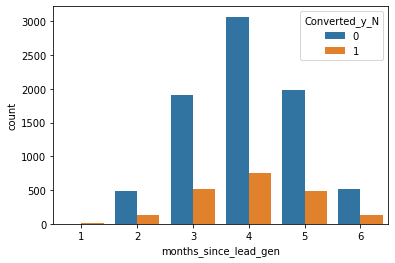

In [20]:
sns.countplot(x=df.months_since_lead_gen,hue=df.Converted_y_N)

## lead generated channels analysis

In [23]:
print(df[df.Converted_y_N==1].lead_gen_channel.value_counts())

Direct      814
Networks    810
Organic     413
Name: lead_gen_channel, dtype: int64


In [24]:
print(df[df.Converted_y_N==0].lead_gen_channel.value_counts())

Networks    4204
Organic     2064
Direct      1695
Name: lead_gen_channel, dtype: int64


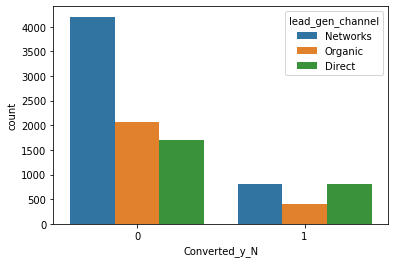

In [25]:
sns.countplot(x=df.Converted_y_N,hue=df.lead_gen_channel)

- it doesn't clearly interpret the data.
- we get conversion rate of each channel to say best channel for conversion.

In [26]:
print(df[df.lead_gen_channel=='Direct'].Converted_y_N.value_counts(normalize=True))

0    0.675568
1    0.324432
Name: Converted_y_N, dtype: float64


In [27]:
print(df[df.lead_gen_channel=='Networks'].Converted_y_N.value_counts(normalize=True))

0    0.838452
1    0.161548
Name: Converted_y_N, dtype: float64


In [28]:
print(df[df.lead_gen_channel=='Organic'].Converted_y_N.value_counts(normalize=True))

0    0.833266
1    0.166734
Name: Converted_y_N, dtype: float64


- from above values we know the direct channel has 2 times more chances of converting so, we use this channel for customer value generation.

## Gender analysis

In [30]:
print(df[df.Converted_y_N==1].Gender.value_counts())

Female    1139
Male       898
Name: Gender, dtype: int64


In [31]:
print(df[df.Converted_y_N==0].Gender.value_counts())

Male      4559
Female    3404
Name: Gender, dtype: int64


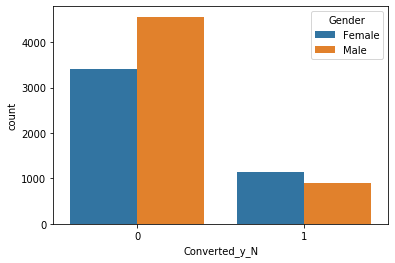

In [32]:
sns.countplot(x=df.Converted_y_N,hue=df.Gender)

- in count wise female has more conversion rate than male.
- but its not enough for analysis
- lets check each gender prob value.

In [33]:
print(df[df.Gender=='Male'].Converted_y_N.value_counts(normalize=True))

0    0.835441
1    0.164559
Name: Converted_y_N, dtype: float64


In [34]:
print(df[df.Gender=='Female'].Converted_y_N.value_counts(normalize=True))

0    0.749285
1    0.250715
Name: Converted_y_N, dtype: float64


- female has 50% more probability to conversion

## age analysis

In [35]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [36]:
age_band=[]
age=df.Age
for i in age:
    if i < 24:
        age_band.append("teenagers")
    elif i >= 24 and i <=64 :
        age_band.append("adults")
    else:
        age_band.append("elderly")

In [37]:
df["age_band"]=age_band

In [38]:
df.head()

,RowNumber,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Converted_y_N,age_band
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1,1,adults
1,2,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0,0,adults
2,3,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1,1,adults
3,4,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0,0,adults
4,5,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1,0,adults


In [39]:
df["age_band"].value_counts()

adults       9393
teenagers     325
elderly       282
Name: age_band, dtype: int64

In [40]:
print(df[df.Converted_y_N==1].age_band.value_counts())

adults       1968
elderly        43
teenagers      26
Name: age_band, dtype: int64


In [41]:
print(df[df.Converted_y_N==0].age_band.value_counts())

adults       7425
teenagers     299
elderly       239
Name: age_band, dtype: int64


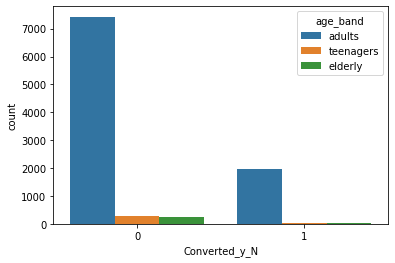

In [42]:
sns.countplot(x=df.Converted_y_N,hue=df["age_band"])

- from above reference both converted & not converted rate high for adults
- we doesn't conclude only with this.
- we check individual conversion rate in age.

In [43]:
print(df[df["age_band"]=='adults'].Converted_y_N.value_counts(normalize=True))

0    0.790482
1    0.209518
Name: Converted_y_N, dtype: float64


In [44]:
print(df[df["age_band"]=='teenagers'].Converted_y_N.value_counts(normalize=True))

0    0.92
1    0.08
Name: Converted_y_N, dtype: float64


In [45]:
print(df[df["age_band"]=='elderly'].Converted_y_N.value_counts(normalize=True))

0    0.847518
1    0.152482
Name: Converted_y_N, dtype: float64


- nothing useful in age.


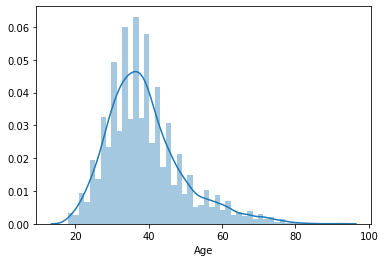

In [46]:
sns.distplot(df.Age)

- age column is not uniformally distributed its slightly right skewed.
- lets we check outliers for age.

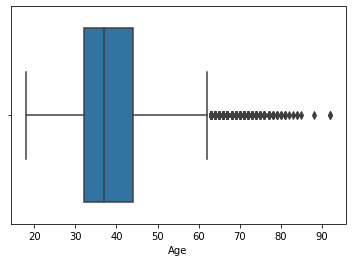

In [47]:
sns.boxplot(df['Age'])

- outliers are present in age field

## City analysis

In [48]:
print(df[df.Converted_y_N==1].City.value_counts())

Hyderabad     232
Chandigarh    213
Ahmedabad     213
Chennai       209
Delhi         203
Bangalore     201
Mumbai        197
New Delhi     196
Surat         177
Cochin        101
Kolkata        95
Name: City, dtype: int64


In [49]:
print(df[df.Converted_y_N==0].City.value_counts())

Surat         851
Bangalore     847
Mumbai        828
Hyderabad     803
Chennai       803
Chandigarh    796
Delhi         786
New Delhi     771
Ahmedabad     771
Cochin        389
Kolkata       318
Name: City, dtype: int64


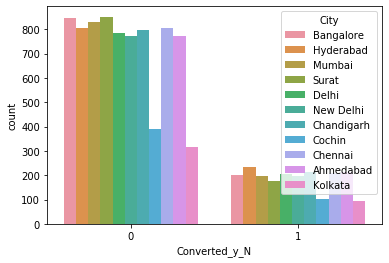

In [50]:
sns.countplot(x=df.Converted_y_N,hue=df.City)

In [51]:
df.groupby("City")["Converted_y_N"].mean().sort_values(ascending=False)

City
Kolkata       0.230024
Hyderabad     0.224155
Ahmedabad     0.216463
Chandigarh    0.211100
Chennai       0.206522
Cochin        0.206122
Delhi         0.205258
New Delhi     0.202689
Mumbai        0.192195
Bangalore     0.191794
Surat         0.172179
Name: Converted_y_N, dtype: float64

In [52]:
a=df.City.unique()

In [53]:
for i in a:
    print(i)
    print(df[df.City==i].Converted_y_N.value_counts(normalize=True))
    print("\n")
    

Bangalore
0    0.808206
1    0.191794
Name: Converted_y_N, dtype: float64


Hyderabad
0    0.775845
1    0.224155
Name: Converted_y_N, dtype: float64


Mumbai
0    0.807805
1    0.192195
Name: Converted_y_N, dtype: float64


Surat
0    0.827821
1    0.172179
Name: Converted_y_N, dtype: float64


Delhi
0    0.794742
1    0.205258
Name: Converted_y_N, dtype: float64


New Delhi
0    0.797311
1    0.202689
Name: Converted_y_N, dtype: float64


Chandigarh
0    0.7889
1    0.2111
Name: Converted_y_N, dtype: float64


Cochin
0    0.793878
1    0.206122
Name: Converted_y_N, dtype: float64


Chennai
0    0.793478
1    0.206522
Name: Converted_y_N, dtype: float64


Ahmedabad
0    0.783537
1    0.216463
Name: Converted_y_N, dtype: float64


Kolkata
0    0.769976
1    0.230024
Name: Converted_y_N, dtype: float64




- from above all cities have similar conversion rate.

## airline loyality analysis

In [54]:
b=df.airline_loyalty_tier.unique()

In [55]:
print(df[df.Converted_y_N==1].airline_loyalty_tier.value_counts())

None        947
Base        460
Silver      361
Platinum    143
Gold        126
Name: airline_loyalty_tier, dtype: int64


In [56]:
print(df[df.Converted_y_N==0].airline_loyalty_tier.value_counts())

None        4747
Base        1212
Silver      1104
Platinum     455
Gold         445
Name: airline_loyalty_tier, dtype: int64


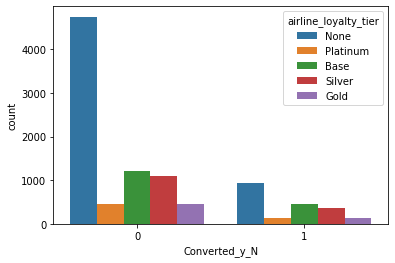

In [57]:
sns.countplot(x=df.Converted_y_N,hue=df.airline_loyalty_tier)

- from above plot no loyalty members has higher rate for both converting and non converting.

In [58]:
for i in b:
    print(i)
    print(df[df.airline_loyalty_tier==i].Converted_y_N.value_counts(normalize=True))
    print("\n")
    

None
0    0.833685
1    0.166315
Name: Converted_y_N, dtype: float64


Platinum
0    0.76087
1    0.23913
Name: Converted_y_N, dtype: float64


Base
0    0.72488
1    0.27512
Name: Converted_y_N, dtype: float64


Silver
0    0.753584
1    0.246416
Name: Converted_y_N, dtype: float64


Gold
0    0.779335
1    0.220665
Name: Converted_y_N, dtype: float64




- From the above analysis :
    - Users with any one of the loyality plans have a 50% higher probality for conversion with 'base' plan with the highest conversion rate.
    - Users without any loyality plans also have a positive conversion rate
    - We  use this feature also for Customer value calculation.

## family member analysis

In [63]:
print(df[df.Converted_y_N==1].no_of_family_members.value_counts())

1    1409
2     348
3     220
4      60
Name: no_of_family_members, dtype: int64


In [64]:
print(df[df.Converted_y_N==0].no_of_family_members.value_counts())

2    4242
1    3675
3      46
Name: no_of_family_members, dtype: int64


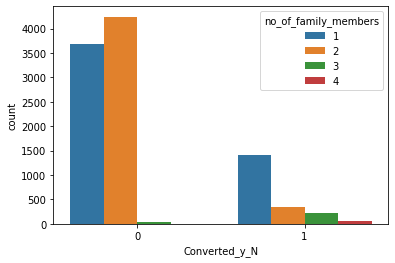

In [65]:
sns.countplot(x=df.Converted_y_N,hue=df.no_of_family_members)

In [67]:
c=df.no_of_family_members.unique()

In [69]:
for i in c:
    print(i)
    print(df[df.no_of_family_members==i].Converted_y_N.value_counts(normalize=True))
    print("\n")
    


1
0    0.722856
1    0.277144
Name: Converted_y_N, dtype: float64


3
1    0.827068
0    0.172932
Name: Converted_y_N, dtype: float64


2
0    0.924183
1    0.075817
Name: Converted_y_N, dtype: float64


4
1    1.0
Name: Converted_y_N, dtype: float64




- the family which has 4 members have the 100% probability of conversion rate.
- use this value for customer value generation.

## 6M prior enquiry analysis

In [74]:
print(df[df.Converted_y_N==1].is_6M_enquiry.value_counts(normalize=True))

0    0.639175
1    0.360825
Name: is_6M_enquiry, dtype: float64


In [75]:
print(df[df.Converted_y_N==0].is_6M_enquiry.value_counts(normalize=True))

1    0.554565
0    0.445435
Name: is_6M_enquiry, dtype: float64


In [72]:
print(df[df.is_6M_enquiry==1].Converted_y_N.value_counts(normalize=True))

0    0.857309
1    0.142691
Name: Converted_y_N, dtype: float64


In [73]:
print(df[df.is_6M_enquiry==0].Converted_y_N.value_counts(normalize=True))

0    0.731491
1    0.268509
Name: Converted_y_N, dtype: float64


 - from the above analysis we can also find out that the enquiry affects the conversion to a certain degree
- leads are converted even they are not enquiry in last 6 months
- We can see that nearly 37% of the leads who visited the website in the last 6 months have converted. This is a very positive sign for conversion and we can use this in the process of lead value processing. 

## recent activity analysis

In [76]:
print(df[df.Converted_y_N==1].is_3M_active.value_counts())

1    1424
0     613
Name: is_3M_active, dtype: int64


In [77]:
print(df[df.Converted_y_N==0].is_3M_active.value_counts())

1    5631
0    2332
Name: is_3M_active, dtype: int64


In [78]:
print(df[df.is_3M_active==0].Converted_y_N.value_counts(normalize=True))

0    0.791851
1    0.208149
Name: Converted_y_N, dtype: float64


In [79]:
print(df[df.is_3M_active==1].Converted_y_N.value_counts(normalize=True))

0    0.798157
1    0.201843
Name: Converted_y_N, dtype: float64


- from above we infer the recent app not more important for conversion rates

## Analysis Insights

   - Our target variable have imbalanced
   
  
   - Most of leads converted between the month of 3 to 5 ,1st month has the best conversion rate it has 100% probability.after this conversion rate reduce and maintain the average of 20% prob
   
   
   - From the network channels, we are getting many leads but its conversion rate is less. But the direct channel leads are converting in high compared with network.
   
   
   - From the male pupils, we are getting the leads in high number. But the conversion rate is higher in the leads from female have 50% more to conversion
   
   
   - The leads are generated in less numbers from the city Cochin and Kolkata. And High no of leads are getting from the Surat and Bangalore.but conversion rate of cities are similar
   
   
   - The people who doesn't have loyalty tier have the higher rate of  converting  it has positive conversion rate
   
   
   - 4 no of family members have the 100% conversion rate
   
   
   - The leads are converted even they didn't make last 6 months enquiry
   
   
   - More or less similar amount of leads is converted either the peoples are active or not active in the websites within the past 3 months

